## Data Analysis using BulkLMM - BXD Longevity Study

In [1]:
using CSV, DelimitedFiles, DataFrames, Missings, XLSX
using LinearAlgebra, Statistics, Optim
using Random, Distributions, LoopVectorization
# using GeneNetworkAPI, Downloads
using BenchmarkTools

In [2]:
using Plots

In [3]:
local_path = "../../BulkLMM.jl/src";

## Load processed_data:

### By individuals:

In [4]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [5]:
BXD_pheno_ind_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_pheno_summary.csv", DataFrame);

By individuals, there are 248 individual samples for 32445 livear proteome.

In [6]:
println(size(BXD_pheno_ind_summary_df)) 
BXD_pheno_ind_summary_df[1:10, 1:10]

(248, 32448)


Row,Sample,Strain,Strain_num,P42209_DESGLNRK_2,P42209_GLRPLDVAFLR_3,Q99M02_VGDPVYR_2,Q99M02_VWIYPIK_2,Q99M02_LCDPSVK_2,Q99M02_CVLTTVDPDTGIIDR_2,Q99M02_LVQFDTSMK_2
,String7,String7,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,H1009,BXD9,9,11.349,11.534,17.587,17.517,17.309,16.574,16.323
2,H0370,BXD9,9,11.249,12.735,17.427,17.325,17.252,16.685,16.021
3,H2577,BXD9,9,12.415,10.487,17.89,17.488,17.594,16.731,16.208
4,H0365,BXD9,9,11.374,10.674,17.714,17.401,17.381,16.621,16.337
5,H1333,BXD13,13,11.687,11.524,17.362,17.367,17.071,16.465,15.97
6,H2259,BXD24,24,11.837,11.715,17.57,17.792,17.505,16.894,16.277
7,H1792,BXD24,24,11.563,11.434,17.789,17.847,17.416,17.042,16.292
8,H1791,BXD24,24,12.5,12.273,17.944,17.833,17.63,16.862,16.3
9,H1541,BXD24,24,11.815,11.564,17.794,17.759,17.456,16.878,16.377


In [7]:
BXD_geno_ind_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_geno_summary.csv", DataFrame);

By individuals, there are 248 individual samples for 7321 markers.

In [8]:
println(size(BXD_geno_ind_summary_df)) 
BXD_geno_ind_summary_df[1:10, 1:10]

(248, 7324)


Row,Sample,Strain,Strain_num,rs31443144,rs6269442,rs32285189,rs258367496,rs32430919,rs36251697,rs30658298
,String7,String7,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,H1009,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,H0370,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H2577,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,H0365,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,H1333,BXD13,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,H2259,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,H1792,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,H1791,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,H1541,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### By strains:

In [9]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [10]:
BXD_pheno_strains_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_pheno_strain_means_summary.csv", DataFrame);

By strains, there are 50 BXD strains for 32445 liver proteome.

In [158]:
println(size(BXD_pheno_strains_summary_df)) 
BXD_pheno_strains_summary_df[1:10, 1:10]

(50, 32447)


Row,Strain,Number of Samples,P42209_DESGLNRK_2,P42209_GLRPLDVAFLR_3,Q99M02_VGDPVYR_2,Q99M02_VWIYPIK_2,Q99M02_LCDPSVK_2,Q99M02_CVLTTVDPDTGIIDR_2,Q99M02_LVQFDTSMK_2,Q99M02_QLQQVGTVSK_2
,String7,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,BXD9,4,11.5968,11.3575,17.6545,17.4327,17.384,16.6528,16.2222,16.3227
2,BXD13,1,11.687,11.524,17.362,17.367,17.071,16.465,15.97,15.98
3,BXD24,5,12.0778,11.7458,17.7926,17.8152,17.5168,16.9196,16.3012,16.4304
4,BXD27,3,11.717,11.149,17.336,17.3143,17.165,16.5283,15.9407,16.002
5,BXD29,11,11.735,11.3496,17.4583,17.3877,17.2431,16.4945,16.0869,16.1075
6,BXD32,8,11.6266,11.554,17.8254,17.7716,17.4639,16.9029,16.434,16.425
7,BXD34,13,11.7491,11.9135,17.6108,17.5974,17.2988,16.7761,16.3147,16.2926
8,BXD39,5,11.9158,11.719,17.395,17.385,17.157,16.5226,16.179,16.0594
9,BXD40,8,11.8651,11.6817,17.5986,17.6386,17.3861,16.6824,16.2855,16.2523


In [12]:
BXD_geno_strains_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_geno_strains_summary.csv", DataFrame);

By strains, there are 50 BXD strains for 7321 markers.

In [13]:
println(size(BXD_geno_strains_summary_df)) 
BXD_geno_strains_summary_df[1:10, 1:10]

(50, 7322)


Row,Strain,rs31443144,rs6269442,rs32285189,rs258367496,rs32430919,rs36251697,rs30658298,rs51852623,rs31879829
,String7,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,BXD9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BXD13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BXD24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BXD27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,BXD29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,BXD32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,BXD34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,BXD39,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,BXD40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Load functions:

In [159]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [160]:
versioninfo()

Julia Version 1.9.2
Commit e4ee485e909 (2023-07-05 09:39 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 48 × Intel(R) Xeon(R) Silver 4214 CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, cascadelake)
  Threads: 25 on 48 virtual cores
Environment:
  JULIA_NUM_THREADS = 24


In [210]:
include(joinpath(local_path, "kinship.jl"));
include(joinpath(local_path, "util.jl"));
include(joinpath(local_path, "wls.jl"));
include(joinpath(local_path, "lmm.jl"));
include(joinpath(local_path, "gridbrent.jl"));
include(joinpath(local_path, "transform_helpers.jl"));
include(joinpath(local_path, "scan.jl"));
include(joinpath(local_path, "bulkscan_helpers.jl"));
include(joinpath(local_path, "bulkscan.jl"));
include(joinpath(local_path, "readData.jl"));
include(joinpath(local_path, "analysis_helpers/single_trait_analysis.jl"));
include("../../BigRiver_util_code/src/kinship_utils.jl");
include("../../BigRiver_util_code/src/plot_utils.jl");

## Objectives

- gemma one trait, ind and strains

- scan_alt one trait, ind and strains

- scan_null one trait, ind and strains

- bulkscan_grid (null), all traits, ...

- data structure for all traits results...

- Heatmap grids_taken, compare on strain means and individuals

- Histogram of heritabilities (null) for all traits (both strain means and individual level data)

- Loglikelihood by h2_grid plot, strain means v.s. individuals

- Report fixed effects:

- Adjusting difference in the number of samples across strains

- Histogram of heritabilities (null) for all traits (both strain means and individual level data)

## Run BulkLMM.jl:

### Calculate kinship:

First, calculate the kinship matrix of relatedness among the strains (50-by-50):

In [17]:
geno_strains = Matrix{Float64}(BXD_geno_strains_summary_df[:, 2:end]);

In [18]:
@time kinship_strains = calcKinship(geno_strains);

  0.002726 seconds (9 allocations: 2.831 MiB)


Then, construct the kinship matrix of relatedness among the individuals based on which strain they are from:

In [19]:
BXD_geno_ind_summary_df.Strain_num = Vector{Int64}(BXD_geno_ind_summary_df.Strain_num);

In [20]:
kinship_ind_from_strains = calcIndKinship_from_StrainKinship(kinship_strains, BXD_geno_ind_summary_df.Strain_num);

### Single-trait genome scans:

To see single trait genome scan results, we take the 29437-th livear proteomic as the single trait to run analysis:  

In [21]:
lp_names = names(BXD_pheno_ind_summary_df)[4:end];

In [22]:
lp_id = 29437;
lp_names[lp_id]

"Q9Z2I8_SSGLPITSAVDLEDAAK_3"

In [23]:
prior = [1.0, 0.0];

#### For individual liver proteome

In [24]:
geno_ind = Matrix{Float64}(BXD_geno_ind_summary_df[:, 4:end]);

In [25]:
lp_ind_Y = Matrix{Float64}(BXD_pheno_ind_summary_df[:, 4:end]);
lp_ind_y = reshape(lp_ind_Y[:, lp_id], :, 1);

In [26]:
lpst_ind_Y = colStandardize(lp_ind_Y);
lpst_ind_y = reshape(lpst_ind_Y[:, lp_id], :, 1);

In [27]:
@time scan_results_ind = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                              prior_variance = 1.0, prior_sample_size = 0.1, reml = true);

  0.516683 seconds (171.60 k allocations: 140.872 MiB, 16.61% gc time, 46.33% compilation time)


In [28]:
@time scan_results_ind_alt = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                                  assumption = "alt", 
                                  prior_variance = prior[1], prior_sample_size = prior[2], reml = true);

  3.194989 seconds (3.06 M allocations: 3.367 GiB, 10.08% gc time, 0.66% compilation time)


In [29]:
@time scan_perms_results_ind = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                                    prior_variance = prior[1], prior_sample_size = prior[2],
                                    permutation_test = true, nperms = 1000, reml = true);

  0.738497 seconds (882.90 k allocations: 274.446 MiB, 6.33% gc time, 426.31% compilation time)


In [30]:
single_results_ind = DataFrame(hcat(scan_results_ind.lod, scan_results_ind_alt.lod, scan_perms_results_ind.lod), ["scan_null", "scan_alt", "scan_perms.original"]);

In [31]:
single_results_ind[1:6, :]

Row,scan_null,scan_alt,scan_perms.original
,Float64,Float64,Float64
1,0.42274,0.43496,0.422737
2,0.42274,0.43496,0.422737
3,0.42274,0.43496,0.422737
4,0.42274,0.43496,0.422737
5,0.42274,0.43496,0.422737
6,0.42274,0.43496,0.422737


#### For liver proteome means by strains

In [216]:
lp_strains_Y = Matrix{Float64}(BXD_pheno_strains_summary_df[:, 3:end]);
lp_strains_y = reshape(lp_strains_Y[:, lp_id], :, 1);

In [217]:
lpst_strains_Y = colStandardize(lp_strains_Y);
lpst_strains_y = reshape(lpst_strains_Y[:, lp_id], :, 1);

In [ ]:
@time scan_results_strains = scan(lpst_strains_y, geno_strains, kinship_strains; 
                                  prior_variance = prior[1], prior_sample_size = prior[2],
                                  optim_interval = 4);

In [ ]:
@time scan_results_strains_alt = scan(lpst_strains_y, geno_strains, kinship_strains;
                                      assumption = "alt",
                                      prior_variance = prior[1], prior_sample_size = prior[2]);

In [ ]:
@time scan_perms_results_strains = scan(lpst_strains_y, geno_strains, kinship_strains;
                                        permutation_test = true, nperms = 1000, 
                                        prior_variance = prior[1], prior_sample_size = prior[2]);

In [ ]:
single_results_strains = DataFrame(hcat(scan_results_strains.lod, scan_results_strains_alt.lod, scan_perms_results_strains.lod), ["scan_null", "scan_alt", "scan_perms.original"]);

In [ ]:
single_results_strains[1:6, :]

### Multiple-trait genome scans:

In [ ]:
BLAS.set_num_threads(Threads.nthreads())

In [ ]:
BLAS.get_num_threads()

using a grid of stepsize 0.10, 0.05, 0.01...

In [ ]:
grid_list10 = collect(0:9).*0.1;
grid_list20 = collect(0.0:0.05:0.95);
grid_list100 = collect(0.0:0.01:0.99);

#### For individual liver proteome

In [32]:
size(lpst_ind_Y)

(248, 32445)

In [33]:
size(lpst_strains_Y)

LoadError: UndefVarError: `lpst_strains_Y` not defined

In [34]:
@time bulkscan_results_ind_null = bulkscan(lp_ind_Y, geno_ind, kinship_ind_from_strains; 
                                           method = "null-exact", reml = true);

103.410948 seconds (26.62 M allocations: 1.744 TiB, 6.74% gc time, 33.83% compilation time)


In [35]:
BLAS.set_num_threads(Threads.nthreads())

In [ ]:
BLAS.get_num_threads()

In [ ]:
@time bulkscan_results_ind_null_grid10 = bulkscan(lp_ind_Y, geno_ind, kinship_ind_from_strains; 
                                                  method = "null-grid", reml = true);

In [ ]:
@time bulkscan_results_ind_alt_grid10 = bulkscan(lp_ind_Y, geno_ind, kinship_ind_from_strains; 
                                                 method = "alt-grid", reml = true);

In [ ]:
#=
@time bulkscan_results_ind_alt_grid20 = bulkscan_alt_grid(lp_ind_Y, geno_ind, kinship_ind_from_strains, grid_list20;
                                                          reml = true);
=#

In [ ]:
@time bulkscan_results_ind_alt_grid100 = bulkscan(lp_ind_Y, geno_ind, kinship_ind_from_strains;
                                                  method = "alt-grid",
                                                  h2_grid = collect(0.0:0.01:0.99),
                                                  reml = true);

In [ ]:
@time bulkscan_results_ind_null_grid10 = bulkscan_null_grid(lp_ind_Y, geno_ind, kinship_ind_from_strains, grid_list10; 
                                                            reml = true);

In [ ]:
@time bulkscan_results_ind_null_grid20 = bulkscan_null_grid(lp_ind_Y, geno_ind, kinship_ind_from_strains, grid_list20;
                                                            reml = true);

In [ ]:
@time bulkscan_results_ind_null_grid100 = bulkscan_null_grid(lp_ind_Y, geno_ind, kinship_ind_from_strains, grid_list100;
                                                             reml = true);

In [ ]:
# writedlm("output/bulklmm_L_ind_null_grid10.txt", bulkscan_results_ind_null_grid10.L, '\t')

In [ ]:
# writedlm("output/bulklmm_L_ind_null_grid20.txt", bulkscan_results_ind_null_grid20.L, '\t')

In [ ]:
# writedlm("output/bulklmm_L_ind_null_grid100.txt", bulkscan_results_ind_null_grid100.L, '\t')

#### For liver proteome means by strains

In [ ]:
@time bulkscan_results_strains_null = bulkscan_null(lpst_strains_Y, geno_strains, kinship_strains; nb = Threads.nthreads(),
                                                     prior_variance = 1.0, prior_sample_size = 0.0, optim_interval = 1);

In [ ]:
BLAS.set_num_threads(Threads.nthreads())

In [ ]:
@time bulkscan_results_strains_alt_grid = bulkscan_alt_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_list10);

In [ ]:
@time bulkscan_results_strains_null_grid = bulkscan_null_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_list10;
                                                              prior_variance = 1.0, prior_sample_size = 0.0);

In [ ]:
pwd()

#### Compare with linear models:

In [ ]:
kinship_id = diagm(ones(size(lpst_ind_Y, 1)));

In [ ]:
bulkscan_results_ind_null_grid.L

In [ ]:
@time bulkscan_results_ind_null_grid_id = bulkscan_null_grid(lpst_ind_Y, geno_ind, kinship_id, grid_list100;
                                                             prior_variance = 1.0, prior_sample_size = 0.0,
                                                             reml = true);

In [ ]:
mean(bulkscan_results_ind_null_grid.L .- bulkscan_results_ind_null_grid_id.L .> 0.0)

### Peformance check:

#### Individual data:
- n = 248
- m = 32445
- p = 7321

In [162]:
size(lpst_ind_Y)

(248, 32445)

In [163]:
size(geno_ind)

(248, 7321)

In [ ]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains)

In [ ]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                prior_variance = 1.0, prior_sample_size = 0.1)

In [ ]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                assumption = "alt")

In [ ]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                assumption = "alt", 
                prior_variance = 1.0, prior_sample_size = 0.1)

In [ ]:
BLAS.get_num_threads()

In [ ]:
@time bulkscan(lpst_ind_Y, geno_ind, kinship_ind_from_strains;
               method = "null-exact", 
               prior_variance = 1.0, prior_sample_size = 0.1);

In [ ]:
BLAS.set_num_threads(Threads.nthreads())

In [ ]:
@benchmark bulkscan(lpst_ind_Y, geno_ind, kinship_ind_from_strains;
               method = "null-grid",
               prior_variance = 1.0, prior_sample_size = 0.1)

In [ ]:
@benchmark bulkscan(lpst_ind_Y, geno_ind, kinship_ind_from_strains;
               method = "alt-grid", 
               prior_variance = 1.0, prior_sample_size = 0.1)

#### Strain mean data:
- n = 50
- m = 32445
- p = 7321

In [ ]:
size(lpst_strains_Y)

In [ ]:
size(geno_strains)

In [ ]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains)

In [ ]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                prior_variance = 1.0, prior_sample_size = 0.1)

In [ ]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                assumption = "alt")

In [ ]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                assumption = "alt", 
                prior_variance = 1.0, prior_sample_size = 0.1)

In [ ]:
BLAS.get_num_threads()

In [ ]:
@time bulkscan_null(lpst_strains_Y, geno_strains, kinship_strains,
                    prior_variance = 1.0, prior_sample_size = 0.1);

In [ ]:
grid_perf = collect(0.0:0.05:0.95);

In [ ]:
grid_ = collect(0.0:0.05:0.95);

In [ ]:
@benchmark bulkscan_null_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_perf;
                              prior_variance = 1.0, prior_sample_size = 0.1)

In [ ]:
@benchmark bulkscan_alt_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_perf)

In [ ]:
grid_fine = collect(0.00:0.01:0.99);

## Compare with GEMMA:

In [37]:
include("../../BigRiver_util_code/src/run_gemma_utils.jl");

In [38]:
m = size(lpst_ind_Y, 2)

32445

In [39]:
p = size(geno_ind, 2)

7321

In [40]:
# samples = sample(1:m, 1000);
samples = Int.(readdlm("output/samples1000.txt")) |> vec

1000-element Vector{Int64}:
  8203
   889
   699
 23309
 20495
 16822
 19001
  3783
  7407
 16682
  8547
  1260
  6436
     ⋮
 24501
  7848
 23230
  1742
 28677
 16358
  2786
 22274
  1747
  3864
 25541
  1157

In [41]:
marker_names = names(BXD_geno_strains_summary_df)[2:end];

#### strains:

In [ ]:
pheno_strains_subset = lpst_strains_Y[:, samples];

In [ ]:
t_strains = @elapsed gemma_L_strains = run_gemma(pheno_strains_subset, geno_strains, kinship_strains,
                                                ["A", "B"], marker_names, 
                                                "data/GEMMA_data/GN886_pheno_strains_y.txt", "data/GEMMA_data/GN886_geno_strains.txt", "data/GEMMA_data/kinship_strains.txt", "results_strains",
                                                "/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64")

In [ ]:
t_strains

In [ ]:
findall(isnan.(gemma_L_strains))

In [ ]:
Threads.nthreads()

In [ ]:
function run_bulklmm_alt(pheno::Array{Float64, 2}, geno::Array{Float64, 2}, kinship::Array{Float64, 2})
    
    m = size(pheno, 2);
    p = size(geno, 2);
    
    L = zeros(p, m);
    
    Threads.@threads for t in 1:1000
        pheno_y = reshape(pheno[:, t], :, 1);
        L[:, t] .= scan(pheno_y, geno, kinship; assumption = "alt", reml = true).lod;
    end
    
    return L
    
end

In [ ]:
BLAS.get_num_threads()

In [ ]:
BLAS.set_num_threads(4)

In [ ]:
# @time bulklmm_L_exact_alt = run_bulklmm_alt(pheno_strains_subset, geno_strains, kinship_strains);

#### individuals:

In [ ]:
pheno_ind_subset = lpst_ind_Y[:, samples];

In [ ]:
t_ind = @elapsed gemma_L_ind = run_gemma(pheno_ind_subset, geno_ind, kinship_ind_from_strains,
                                         ["A", "B"], marker_names, 
                                         "data/GEMMA_data/GN886_pheno_ind_y.txt", "data/GEMMA_data/GN886_geno_ind.txt", "data/GEMMA_data/kinship_ind.txt", "results_ind",
                                         "/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64")

In [ ]:
t_ind/1000*m

In [ ]:
t_ind

In [ ]:
findall(isnan.(gemma_L_ind))

In [ ]:
findall(isinf.(gemma_L_ind))

In [ ]:
gemma_L_ind

In [ ]:
pwd()

In [ ]:
# writedlm("output/gemma_L_strains.txt", gemma_L_strains, '\t');
# writedlm("output/gemma_L_ind.txt", gemma_L_ind, '\t');
# writedlm("output/samples1000.txt", samples, '\t');

In [ ]:
abs_diff = abs.(bulkscan_results_ind_null.L[:, samples] .- gemma_L_ind);

In [ ]:
mean_abs_diff = 0;

In [ ]:
mean_abs_diff

In [42]:
bulkscan_results_ind_null.L[:, samples];

In [44]:
gemma_ind_L = readdlm("output/gemma_L_ind.txt", '\t');

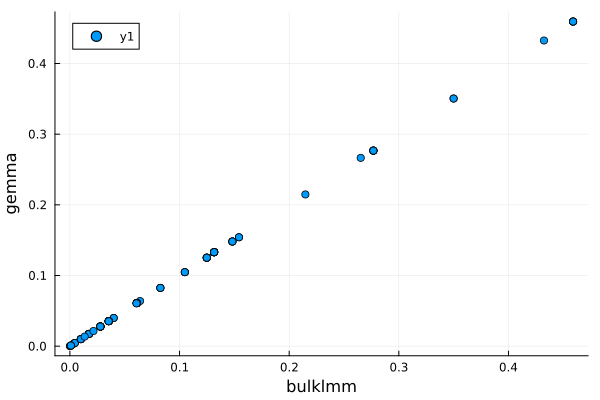

In [45]:
scatter(bulkscan_results_ind_null.L[1:100, samples[1]], gemma_ind_L[1:100, 1], xlab = "bulklmm", ylab = "gemma")

In [ ]:
test_bulkscan_ind_null = bulkscan_results_ind_null.L[:, samples];

In [ ]:
toRemove = findall(isinf.(gemma_ind_L))

In [ ]:
for bad in toRemove
    i = bad[1];
    j = bad[2];
    
    test_bulkscan_ind_null[i, j] = 0;
    gemma_ind_L[i, j] = 0.0;
end

In [ ]:
mean(abs.(bulkscan_results_ind_null.L[:, samples] .- gemma_ind_L))

In [ ]:
mean((bulkscan_results_ind_null.L[:, samples] .- gemma_ind_L) .> 0.0)

In [ ]:
scatter(bulkscan_results_ind_null.L[:, samples[1]], gemma_ind_L[:, 1], xlab = "bulklmm_null", ylab = "gemma", legend = false)
plot!(x -> x)

In [ ]:
scatter(bulkscan_results_ind_null_grid.L[:, samples[1]], gemma_ind_L[:, 1], xlab = "bulklmm_null_grid", ylab = "gemma", legend = false)
plot!(x -> x)

In [ ]:
scatter(bulkscan_results_ind_alt_grid.L[:, samples[1]], gemma_ind_L[:, 1], xlab = "bulklmm_alt_grid", ylab = "gemma", legend = false)
plot!(x -> x)

In [ ]:
bulkscan_L_ind_null = bulkscan_results_ind_null.L[:, samples];

In [ ]:
bulkscan_L_ind_null_grid = bulkscan_results_ind_null_grid.L[:, samples];

In [ ]:
bulkscan_L_ind_alt_grid = bulkscan_results_ind_alt_grid.L[:, samples];

In [ ]:
bulkscan_L_strains_null = bulkscan_results_strains_null.L[:, samples];

In [ ]:
bulkscan_L_strains_null_grid = bulkscan_results_strains_null_grid.L[:, samples];

In [ ]:
bulkscan_L_strains_alt_grid = bulkscan_results_strains_alt_grid.L[:, samples];

In [ ]:
#= 
writedlm("output/bulklmm_L_ind_null_grid10.txt", bulkscan_results_ind_null_grid10.L[:, samples], '\t');
writedlm("output/bulklmm_L_ind_null_grid20.txt", bulkscan_results_ind_null_grid20.L[:, samples], '\t');
writedlm("output/bulklmm_L_ind_null_grid100.txt", bulkscan_results_ind_null_grid100.L[:, samples], '\t')
=#

In [ ]:
#= 
writedlm("output/bulklmm_L_ind_alt_grid10.txt", bulkscan_results_ind_alt_grid10.L[:, samples], '\t');
writedlm("output/bulklmm_L_ind_alt_grid20.txt", bulkscan_results_ind_alt_grid20.L[:, samples], '\t');
writedlm("output/bulklmm_L_ind_alt_grid100.txt", bulkscan_results_ind_alt_grid100.L[:, samples], '\t')
=#

In [ ]:
BLAS.get_num_threads()

In [ ]:
timing_null_exact_samples_1 = @elapsed bulkscan_null_exact_samples_nc = bulkscan_null(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains;
                                                                                      reml = true);

In [ ]:
timing_null_exact_samples = @elapsed bulkscan_null_exact_samples_c = bulkscan_null(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains;
                                                   nb = 16, nt_blas = 1,
                                                   reml = true, optim_interval = 10);

In [ ]:
kinship_id = diagm(ones(size(lp_ind_Y, 1)));

In [ ]:
timing_LM_exact_samples = @elapsed bulkscan_LM_exact_samples = bulkscan_null(lp_ind_Y[:, samples], geno_ind, kinship_id;
                                                                             nb = 16, nt_blas = 1,
                                                                             reml = true, optim_interval = 10);

In [ ]:
maximum(abs.(bulkscan_results_ind_null.L[:, samples] .- bulkscan_null_exact_samples_c.L))

In [ ]:
maximum(abs.(bulkscan_LM_exact_samples.L .- bulkscan_null_exact_samples_c.L))

In [ ]:
timing_null_exact_samples_1

In [151]:
timing_null_exact_samples = (@benchmark bulkscan(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains;
                                               method = "null-exact",
                                               reml = true)) |> x -> median(x.times);

In [153]:
@benchmark bulkscan(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains;
                                               method = "null-exact",
                                               reml = true)

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  4.608 s …    4.804 s  ┊ GC (min … max): 2.59% … 3.82%
 Time  (median):     4.706 s               ┊ GC (median):    3.22%
 Time  (mean ± σ):   4.706 s ± 138.634 ms  ┊ GC (mean ± σ):  3.22% ± 0.87%

  █                                                        █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  4.61 s         Histogram: frequency by time          4.8 s <

 Memory estimate: 55.10 GiB, allocs estimate: 762427.

In [152]:
timing_null_exact_samples

4.744306578e9

In [154]:
BLAS.get_num_threads()

1

In [134]:
BLAS.set_num_threads(24)

In [141]:
timing_null_grid_samples10 = (@benchmark bulkscan(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains; 
                                               reml = true)) |> x -> median(x.times);

In [150]:
@benchmark bulkscan(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains; 
                                               reml = true)

BenchmarkTools.Trial: 14 samples with 1 evaluation.
 Range (min … max):  357.380 ms … 410.516 ms  ┊ GC (min … max): 0.00% … 0.96%
 Time  (median):     374.340 ms               ┊ GC (median):    0.98%
 Time  (mean ± σ):   378.904 ms ±  14.966 ms  ┊ GC (mean ± σ):  0.59% ± 0.53%

  ▁         ▁ ▁ ▁▁▁ ▁▁     ▁ █         ▁                   ▁  ▁  
  █▁▁▁▁▁▁▁▁▁█▁█▁███▁██▁▁▁▁▁█▁█▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁█ ▁
  357 ms           Histogram: frequency by time          411 ms <

 Memory estimate: 925.87 MiB, allocs estimate: 5080.

In [149]:
timing_null_grid_samples10

3.86749098e8

In [142]:
timing_null_grid_samples20 = (@benchmark bulkscan(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains;
                                               h2_grid = collect(0.0:0.05:0.95),
                                               reml = true)) |> x -> median(x.times);

In [143]:
timing_null_grid_samples100 = (@benchmark bulkscan(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains;
                                                          h2_grid = collect(0.0:0.01:0.99),
                                                          reml = true)) |> x -> median(x.times);

In [112]:
# writedlm("output/bulklmm_L_ind_LM.txt", bulkscan_LM_exact_samples.L, '\t');

In [113]:
# writedlm("output/bulklmm_L_ind_null.txt", bulkscan_null_exact_samples_nc.L, '\t');

In [114]:
# writedlm("output/bulklmm_L_ind_null_corrected10.txt", bulkscan_null_exact_samples_c.L, '\t');

In [115]:
# writedlm("output/bulklmm_L_ind_null.txt", bulkscan_null_exact_samples.L, '\t');

In [144]:
BLAS.set_num_threads(12)

In [145]:
timing_alt_grid_samples10 = (@benchmark bulkscan(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains;
                                              method = "alt-grid",      
                                              reml = true)) |> x -> median(x.times);

In [146]:
timing_alt_grid_samples20 = (@benchmark bulkscan(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains;
                                              h2_grid = collect(0.0:0.05:0.95),
                                              method = "alt-grid",      
                                              reml = true)) |> x -> median(x.times);

In [147]:
timing_alt_grid_samples100 = (@benchmark bulkscan(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains;
                                              h2_grid = collect(0.0:0.01:0.99),
                                              method = "alt-grid",      
                                              reml = true)) |> x -> median(x.times);

In [157]:
hcat([timing_null_grid_samples10, timing_null_grid_samples20, timing_null_grid_samples100],
     [timing_alt_grid_samples10, timing_alt_grid_samples20, timing_alt_grid_samples100])./1e9

3×2 Matrix{Float64}:
 0.386749   2.18925
 0.755738   3.87308
 3.17922   16.5015

## Study of grid_size effects on results:

In [ ]:
function subdivide_interval(num_subintervals::Int)
    if num_subintervals <= 0
        error("Invalid number of sub-intervals.")
    end
    
    subinterval_size = 1.0 / num_subintervals
    subintervals = zeros(Float64, num_subintervals, 2)
    
    for i in 1:num_subintervals
        start_point = (i - 1) * subinterval_size
        end_point = i * subinterval_size
        subintervals[i, :] = [start_point, end_point]
    end
    
    subintervals[end, 2] = 0.99999
    return subintervals
end

In [ ]:
list_of_grid_lists = Array{Array{Float64, 1}, 1}(undef, 100);
for i in 1:100
    temp = subdivide_interval(i)[:, 2];
    temp = vcat(0.0, temp);
    list_of_grid_lists[i] = temp;
end

In [ ]:
timings_each_grid = zeros(100);
k = 0;
@time begin
    for grid_list in list_of_grid_lists
        
        k = k+1;
        timings_each_grid[k] = @elapsed bulkscan_null_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_list);

    end
end

In [ ]:
absErrors_each_grid = zeros(100);

k = 0;
@time begin
    
    for grid_list in list_of_grid_lists
        
        k = k+1;
        
        null_grid_k_results = bulkscan_null_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_list).L;
        absErrors_each_grid[k] = mean(abs.(null_grid_k_results .- bulkscan_results_ind_null.L))

    end
end

In [ ]:
h2_study_summary = CSV.read("output/h2_study/h2_summary.csv", DataFrame)

In [ ]:
timings_each_grid = h2_study_summary[:, 1];
absErrors_each_grid = h2_study_summary[:, 2];

In [ ]:
bulkscan_results_ind_null.L

In [ ]:
fit_h2_timings = wls(reshape(timings_each_grid, :, 1), hcat(ones(100), collect(1:100).*1.0), ones(100), [0.0, 0.0]);

In [ ]:
coefs_h2_timings = round.(fit_h2_timings.b, digits = 2)

In [ ]:
plot(timings_each_grid, label = "Runtime(in s) by grid size");
plot!(x -> fit_h2_timings.b[1]+fit_h2_timings.b[2]*x, label = "y = 5.13+0.43x")

In [ ]:
fine_grid = collect(1:99).*0.01;

In [ ]:
timings_each_grid

In [ ]:
fit_h2_timings.b

In [ ]:
5.133367084781798+0.43327207080273666*100

In [ ]:
timings_each_grid[34]

In [ ]:
absErrors_each_grid[34]

In [ ]:
?annotate!

In [ ]:
minimum(absErrors_each_grid)

In [ ]:
findfirst(absErrors_each_grid.<= 0.01)

In [ ]:
timings_each_grid[15]

In [ ]:
absErrors_each_grid[15]

In [ ]:
plot(timings_each_grid, label = "Runtime(in s) by grid size", color = "green", 
     xaxis = "h2-grid size", yaxis = "Runtime (s)",
     xlims = (0.0, 100.0), ylims = (0.0, 45.0), legend = :topright);
plot!(twinx(), absErrors_each_grid, label = "Mean absolute errors", 
      color = "blue", legend = :topleft, yaxis = "Errors in LODs")
plot!([15.0, 15.0], [0.0, 11.30], color = "red", label = false, linestyle=:dash)
plot!([0.0, 15.0], [11.30, 11.30], color = "red", label = false, linestyle=:dash)
plot!([15.0, 105.0], [2.8, 2.8], color = "red", label = false, linestyle=:dash)
plot!(x -> fit_h2_timings.b[1]+fit_h2_timings.b[2]*x, label = "y = 5.13+0.43x", linestyle=:dash)
annotate!([15.0], [-1.0], ("15", 8, "red"))
annotate!([-4], [11.30], ("11.30", 8, "green"))
annotate!([105.0], [2.8], ("0.0098", 8, "blue"))

In [ ]:
h2_df = DataFrame(hcat(timings_each_grid, absErrors_each_grid), ["Timing", "Mean Absolute Difference"])

In [ ]:
pwd()

In [ ]:
# CSV.write("output/h2_study/h2_summary.csv", h2_df);

In [ ]:
BLAS.set_num_threads(1)

In [ ]:
@time test1 = scan(reshape(lpst_ind_Y[:, 3], :, 1), geno_ind, kinship_ind_from_strains);

In [ ]:
BLAS.set_num_threads(4)

In [ ]:
BLAS.get_num_threads()

In [ ]:
@time test2 = scan(reshape(lpst_ind_Y[:, 3], :, 1), geno_ind, kinship_ind_from_strains);

In [ ]:
@time test3 = scan(reshape(lpst_ind_Y[:, 3], :, 1), geno_ind, kinship_ind_from_strains);

In [ ]:
test1.h2_null

In [ ]:
test2.h2_null

In [ ]:
test3.h2_null

In [ ]:
maximum(abs.(test1.lod .- test2.lod))

In [ ]:
?bulkscan

In [202]:
BLAS.set_num_threads(Threads.nthreads())
BLAS.get_num_threads()

24

In [206]:
@time test_h2_nc = bulkscan(lpst_ind_Y, geno_ind, kinship_ind_from_strains;
                            reml = true,
                            h2_grid = collect(0.00:0.01:0.99));

 16.373105 seconds (127.60 k allocations: 34.767 GiB, 0.65% gc time)


In [204]:
@time test_h2_c = bulkscan(lpst_ind_Y, geno_ind, kinship_ind_from_strains;
                           reml = true,
                           h2_grid = collect(0.00:0.01:0.99), 
                           prior_variance = 1.0, prior_sample_size = 0.1);

 14.426598 seconds (127.59 k allocations: 34.767 GiB, 0.57% gc time)


In [174]:
@time test_h2_nc_exact = bulkscan(lpst_ind_Y, geno_ind, kinship_ind_from_strains; 
                                  method = "null-exact", reml = true);

186.291379 seconds (23.66 M allocations: 1.743 TiB, 2.14% gc time)


In [218]:
@time test_h2_nc_exact_strains = bulkscan(lpst_strains_Y, geno_strains, kinship_strains; 
                                  method = "null-exact", reml = true);

 29.618448 seconds (33.68 M allocations: 373.135 GiB, 6.22% gc time, 74.96% compilation time)


In [188]:
@time test_h2_c_exact = bulkscan(lpst_ind_Y, geno_ind, kinship_ind_from_strains; 
                           method = "null-exact", reml = true,
                           prior_variance = 1.0, prior_sample_size = 0.1);

194.109278 seconds (26.49 M allocations: 1.744 TiB, 1.98% gc time, 9.00% compilation time)


In [168]:
maximum(test_h2_nc.h2_null_list)

0.95

In [169]:
maximum(test_h2_c.h2_null_list)

0.95

In [219]:
findmax(test_h2_nc_exact_strains.h2_null_list)

(0.999999984947842, 18)

In [178]:
findmax(test_h2_nc_exact.h2_null_list)

(0.9539702211017628, 21498)

In [177]:
maximum(test_h2_c_exact.h2_null_list)

0.9527586150646432

In [191]:
bad_trait = 21498

21498

In [192]:
@time single_trait_example_nc = scan(lpst_ind_Y[:, bad_trait], geno_ind, kinship_ind_from_strains; 
                                     reml = true, 
                                     profileLL = true, markerID = 1, h2_grid = collect(0.00:0.01:0.99));

  0.167871 seconds (85.03 k allocations: 168.567 MiB)


In [194]:
@time single_trait_example_c = scan(lpst_ind_Y[:, bad_trait], geno_ind, kinship_ind_from_strains;
                                    reml = true, 
                                    prior_variance = 1.0, prior_sample_size = 0.1);

  0.124927 seconds (80.93 k allocations: 134.840 MiB)


In [205]:
test_trait = reshape(lpst_ind_Y[:, bad_trait], :, 1);

In [221]:
@time scan_getLL = scan(lpst_ind_Y[:, bad_trait], geno_ind, kinship_ind_from_strains;
                  profileLL = true,
                  h2_grid = collect(0.0:0.0001:0.9999),
                  reml = true);

  1.306180 seconds (490.94 k allocations: 617.901 MiB, 36.72% gc time)


In [212]:
@time p1 = plotLL(test_trait, geno_ind, ones(248, 1), 
                  kinship_ind_from_strains, 
                  collect(0.0:0.001:0.999);
                  reml = true, prior = [var(test_trait), 0.0]);
@time p2 = plotLL(test_trait, geno_ind, ones(248, 1), 
                  kinship_ind_from_strains, 
                  collect(0.0:0.001:0.999);
                  reml = true, prior = [var(test_trait), 0.1]);


  0.063844 seconds (55.58 k allocations: 74.943 MiB)
  0.063141 seconds (55.58 k allocations: 74.943 MiB)


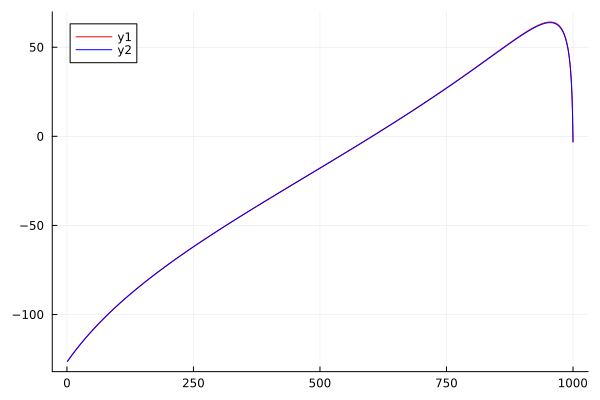

In [214]:
plot(p1.ell_null, color = "red")
plot!(p2.ell_null, color = "blue")